First 5 Rows:
   Customer_ID Region     Category  Purchase_Amount Purchase_Date
0            1   East    Groceries           4091.0    2023-01-01
1            2   West    Furniture           4823.0    2023-01-02
2            3  North    Groceries           4782.0    2023-01-03
3            4   East  Electronics           1748.0    2023-01-04
4            5   East    Furniture           1545.0    2023-01-05

Missing Values Before Cleaning:
Customer_ID        0
Region             1
Category           0
Purchase_Amount    1
Purchase_Date      0
dtype: int64

Missing Values After Cleaning:
Customer_ID        0
Region             0
Category           0
Purchase_Amount    0
Purchase_Date      0
dtype: int64

Statistical Summary:
       Customer_ID  Purchase_Amount        Purchase_Date
count   200.000000       200.000000                  200
mean    100.500000      2638.060302  2023-04-10 12:00:00
min       1.000000       104.000000  2023-01-01 00:00:00
25%      50.750000      1336.750000  20

/tmp/ipython-input-2259470865.py:38: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Purchase_Amount"].fillna(df["Purchase_Amount"].mean(), inplace=True)
/tmp/ipython-input-2259470865.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

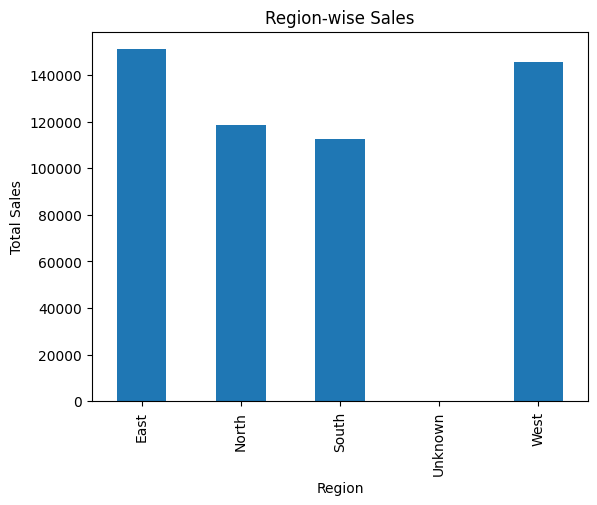

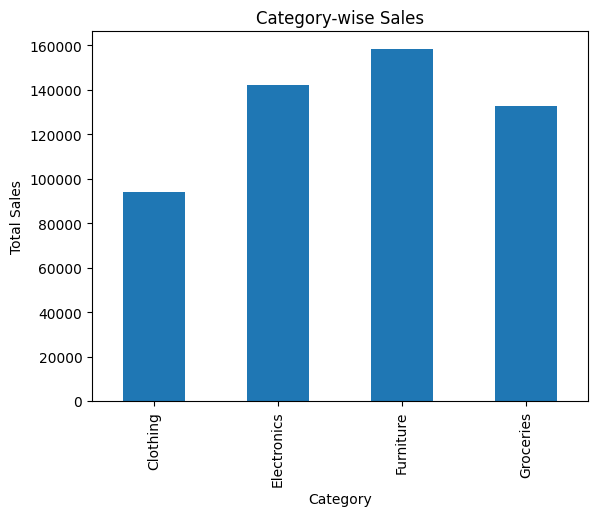

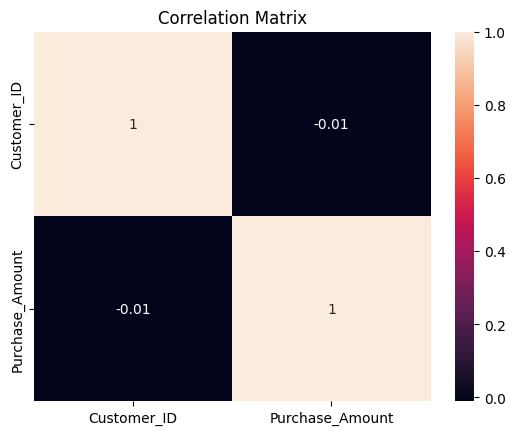


Key Insights:
1. Highest revenue region: East
2. Highest selling category: Furniture
3. Average Purchase Amount: 2638.060301507538


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# STEP 1: Create Sample Dataset
# -----------------------------

np.random.seed(42)

data = {
    "Customer_ID": np.arange(1, 201),
    "Region": np.random.choice(["North", "South", "East", "West"], 200),
    "Category": np.random.choice(["Electronics", "Clothing", "Groceries", "Furniture"], 200),
    "Purchase_Amount": np.random.randint(100, 5000, 200),
    "Purchase_Date": pd.date_range(start="2023-01-01", periods=200, freq="D")
}

df = pd.DataFrame(data)

# Introduce some missing values
df.loc[5, "Purchase_Amount"] = np.nan
df.loc[10, "Region"] = np.nan

print("First 5 Rows:")
print(df.head())

# -----------------------------
# STEP 2: Data Cleaning
# -----------------------------

print("\nMissing Values Before Cleaning:")
print(df.isnull().sum())

# Fill missing values
df["Purchase_Amount"].fillna(df["Purchase_Amount"].mean(), inplace=True)
df["Region"].fillna("Unknown", inplace=True)

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())

# -----------------------------
# STEP 3: Descriptive Statistics
# -----------------------------

print("\nStatistical Summary:")
print(df.describe())

# -----------------------------
# STEP 4: Region-wise Sales
# -----------------------------

region_sales = df.groupby("Region")["Purchase_Amount"].sum()

plt.figure()
region_sales.plot(kind="bar")
plt.title("Region-wise Sales")
plt.ylabel("Total Sales")
plt.show()

# -----------------------------
# STEP 5: Category-wise Sales
# -----------------------------

category_sales = df.groupby("Category")["Purchase_Amount"].sum()

plt.figure()
category_sales.plot(kind="bar")
plt.title("Category-wise Sales")
plt.ylabel("Total Sales")
plt.show()

# -----------------------------
# STEP 6: Correlation Analysis
# -----------------------------

correlation = df.corr(numeric_only=True)

plt.figure()
sns.heatmap(correlation, annot=True)
plt.title("Correlation Matrix")
plt.show()

# -----------------------------
# STEP 7: Key Insights
# -----------------------------

print("\nKey Insights:")
print("1. Highest revenue region:", region_sales.idxmax())
print("2. Highest selling category:", category_sales.idxmax())
print("3. Average Purchase Amount:", df["Purchase_Amount"].mean())
